In [2]:
# Basic data handling and mathematical operations
import math
import numpy as np
import pandas as pd
from scipy import stats

# Statistical modeling and evaluation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.tools import add_constant

# Machine learning
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Geospatial data processing
import geopandas as gpd
from pyproj import Transformer
from shapely.geometry import Point
from math import sqrt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
from rfpimp import importances, plot_importances

# Ignore warning
import warnings
warnings.filterwarnings("ignore")  

# Auxiliary tools
from io import BytesIO
import requests

# OSM
import osmnx as ox

In [3]:
import geopandas as gpd

In [4]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

import contextily as ctx

# 1 Import

## 1.0 LSOA

In [4]:
# Read geodataset from a local "data" folder
gis_path = "statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp"
gdf_LSOA = gpd.read_file(gis_path)

# area km2
gdf_LSOA['area'] = gdf_LSOA['geometry'].area 

gdf_LSOA.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181...",133320.768859
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",226191.273063
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182...",57302.966528
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180...",190738.760508
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",144195.846859


## 1.1 dft-road-casualty-statistics-collision-last-5-years（2018-2022）
link: https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

In [5]:
collision = 'dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.csv'
df_collision = pd.read_csv(collision)

In [6]:
df_collision

,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location
0,2023010419171,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,5,4,8,2,0,0,-1,1,-1,E01003383
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,1,4,1,1,0,0,-1,1,-1,E01001547
2,2023010419189,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,0,4,1,1,0,0,-1,1,-1,E01002448
3,2023010419191,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,0,4,9,1,0,0,-1,1,-1,E01000129
4,2023010419192,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,0,4,1,1,0,0,-1,1,-1,E01004583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49311,2023991365442,2023,991365442,277013.0,660821.0,-3.964751,55.824917,99,2,2,...,0,1,1,1,0,0,-1,2,-1,-1
49312,2023991366101,2023,991366101,261419.0,666580.0,-4.216416,55.872396,99,3,1,...,0,1,1,1,0,0,-1,1,-1,-1
49313,2023991366235,2023,991366235,291253.0,753153.0,-3.775543,56.657487,99,2,1,...,5,4,1,2,0,0,-1,2,-1,-1
49314,2023991369054,2023,991369054,248192.0,854679.0,-4.538916,57.556636,99,2,2,...,0,1,1,1,0,0,-1,1,-1,-1


In [7]:
df_collision['collision_index'] = df_collision['collision_index'].astype(str)
df_collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49316 entries, 0 to 49315
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   collision_index                               49316 non-null  object 
 1   collision_year                                49316 non-null  int64  
 2   collision_reference                           49316 non-null  object 
 3   location_easting_osgr                         49232 non-null  float64
 4   location_northing_osgr                        49232 non-null  float64
 5   longitude                                     49232 non-null  float64
 6   latitude                                      49232 non-null  float64
 7   police_force                                  49316 non-null  int64  
 8   legacy_collision_severity                     49316 non-null  int64  
 9   number_of_vehicles                            49316 non-null 

In [8]:
df_collision.columns

Index(['collision_index', 'collision_year', 'collision_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'legacy_collision_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_collision',
       'trunk_road_flag', 'lsoa_of_collision_location'],
      dtype='object')

In [9]:
df_collision.rename(columns={'collision_index': 'accident_index', 'collision_year': 'accident_year',
                             'collision_reference': 'accident_reference',
                            'legacy_collision_severity':'accident_severity',
                             'did_police_officer_attend_scene_of_collision':'did_police_officer_attend_scene_of_accident',
                             'lsoa_of_collision_location':'lsoa_of_accident_location'
                            }, inplace=True)

In [10]:
# include all UK data, only select london LSOA
london_lsoa_codes = gdf_LSOA['LSOA11CD'].tolist()
df_collision = df_collision[df_collision['lsoa_of_accident_location'].isin(london_lsoa_codes)]

df_collision.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11270 entries, 0 to 42259
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               11270 non-null  object 
 1   accident_year                                11270 non-null  int64  
 2   accident_reference                           11270 non-null  object 
 3   location_easting_osgr                        11261 non-null  float64
 4   location_northing_osgr                       11261 non-null  float64
 5   longitude                                    11261 non-null  float64
 6   latitude                                     11261 non-null  float64
 7   police_force                                 11270 non-null  int64  
 8   accident_severity                            11270 non-null  int64  
 9   number_of_vehicles                           11270 non-null  int64  
 10  num

In [11]:
df_collision.replace(-1, np.nan, inplace=True)

In [12]:
import pandas as pd

df_collision = df_collision.dropna(subset=['location_easting_osgr'])

### Choose relavant values and merge features

In [13]:
df_collision.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [14]:
df_collision_select=df_collision[["accident_index","location_easting_osgr","location_northing_osgr",
                                  "longitude","latitude","lsoa_of_accident_location","accident_severity",
                                  "number_of_vehicles","day_of_week","first_road_class","speed_limit","road_type",
                                  "pedestrian_crossing_physical_facilities","light_conditions",
                                  "weather_conditions","urban_or_rural_area","junction_detail"]]

In [15]:
df_collision_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11261 entries, 0 to 42259
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           11261 non-null  object 
 1   location_easting_osgr                    11261 non-null  float64
 2   location_northing_osgr                   11261 non-null  float64
 3   longitude                                11261 non-null  float64
 4   latitude                                 11261 non-null  float64
 5   lsoa_of_accident_location                11261 non-null  object 
 6   accident_severity                        11261 non-null  int64  
 7   number_of_vehicles                       11261 non-null  int64  
 8   day_of_week                              11261 non-null  int64  
 9   first_road_class                         11261 non-null  int64  
 10  speed_limit                              11250 non-

In [16]:
# road_type
# road_type	1	Roundabout
# road_type	2	One way street
# road_type	3	Dual carriageway
# road_type	6	Single carriageway
# road_type	7	Slip road
# road_type	9	Unknown
# road_type	12	One way street/Slip road
# road_type	-1	Data missing or out of range
# speed_limit		
# speed_limit	-1	Data missing or out of range
# speed_limit	99	unknown (self reported)

road_type_mapping = {
    1: 'Other',
    2: 'Single',
    3: 'Dual',
    6: 'Single',
    7: 'Other',
    9: 'Other',
    12: 'Single',
    99: 'Other'
}

# Apply the mapping to the 'first_road_class' column
df_collision_select['road_type'] = df_collision_select['road_type'].map(road_type_mapping)

In [17]:
# # accident_severity
# 1	Fatal
# 2	Serious
# 3	Slight
accident_severity_mapping = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

# Apply the mapping to the 'first_road_class' column
df_collision_select['accident_severity'] = df_collision_select['accident_severity'].map(accident_severity_mapping)

In [18]:
# day of a week
df_collision_select['day_of_week'] = df_collision_select['day_of_week'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

In [19]:
# road class
# Define a mapping from numbers to road classes
road_class_mapping = {
    1: 'Motorway',
    2: 'A_Road',
    3: 'A_Road',
    4: 'B_Road',
    5: 'C_Road',
    6: 'Unclassified'
}

# Apply the mapping to the 'first_road_class' column
df_collision_select['first_road_class'] = df_collision_select['first_road_class'].map(road_class_mapping)

In [20]:
# speed_limit
# 20,30,40,50,60,70
df_collision_select['speed_limit'].unique()

array([20., 30., 50., 40., nan, 70., 60.])

In [21]:
# pedestrian_crossing_physical_facilities

# 0	No physical crossing facilities within 50 metres
# 1	Zebra
# 4	Pelican, puffin, toucan or similar non-junction pedestrian light crossing
# 5	Pedestrian phase at traffic signal junction
# 7	Footbridge or subway
# 8	Central refuge
# -1	Data missing or out of range
# 9	unknown (self reported)

# Define a mapping from numbers
pedestrian_crossing_physical_facilities_mapping = {
    0: 'No_facilities',
    1: 'Zebra',
    4: 'pedestrian_light_controlled',
    5: 'pedestrian_light_controlled',
    7: 'Others',
    8: 'Others',
    9: None
}

# Apply the mapping 
df_collision_select['pedestrian_crossing_physical_facilities'] = df_collision_select['pedestrian_crossing_physical_facilities'].map(pedestrian_crossing_physical_facilities_mapping)

In [22]:
# change none to nan
df_collision_select['pedestrian_crossing_physical_facilities'] = df_collision_select['pedestrian_crossing_physical_facilities'].replace({None: np.nan})
df_collision_select['pedestrian_crossing_physical_facilities'].unique()

array(['pedestrian_light_controlled', 'Zebra', 'No_facilities', nan,
       'Others'], dtype=object)

In [23]:
# light_conditions

# 1	Daylight
# 4	Darkness - lights lit
# 5	Darkness - lights unlit
# 6	Darkness - no lighting
# 7	Darkness - lighting unknown
# -1	Data missing or out of range

# Define a mapping from numbers
light_conditions_mapping = {
    1: 'Daylight',
    4: 'Night_time_light',
    5: 'Night_time_nolight',
    6: 'Night_time_nolight',
    7: 'Night_time_nolight',
}

# Apply the mapping 
df_collision_select['light_conditions'] = df_collision_select['light_conditions'].map(light_conditions_mapping)

In [24]:
df_collision_select['light_conditions'].unique()

array(['Night_time_light', 'Daylight', 'Night_time_nolight'], dtype=object)

In [25]:
# weather_conditions

# 1	Fine no high winds
# 2	Raining no high winds
# 3	Snowing no high winds
# 4	Fine + high winds
# 5	Raining + high winds
# 6	Snowing + high winds
# 7	Fog or mist
# 8	Other
# 9	Unknown

# Define a mapping from numbers
weather_conditions_mapping = {
    1: 'Fine',
    2: 'Raining/Snowing',
    3: 'Raining/Snowing',
    4: 'Fine',
    5: 'Raining/Snowing',
    6: 'Raining/Snowing',
    7: 'Fog',
    8: None,
    9: None
}

# Apply the mapping 
df_collision_select['weather_conditions'] = df_collision_select['weather_conditions'].map(weather_conditions_mapping)

In [26]:
# change none to nan
df_collision_select['weather_conditions'] = df_collision_select['weather_conditions'].replace({None: np.nan})
df_collision_select['weather_conditions'].unique()

array([nan, 'Fine', 'Raining/Snowing', 'Fog'], dtype=object)

In [27]:
# urban_or_rural_area

# 1	Urban
# 2	Rural
# 3	Unallocated

# Define a mapping from numbers
urban_or_rural_area_mapping = {
    1: 'Urban',
    2: 'Rural',
    3: None
}

# Apply the mapping 
df_collision_select['urban_or_rural_area'] = df_collision_select['urban_or_rural_area'].map(urban_or_rural_area_mapping)

In [28]:
df_collision_select['urban_or_rural_area'].unique()

array([nan], dtype=object)

In [29]:
# junction_detail
#0	Not at junction or within 20 metres
# 1	Roundabout
# 2	Mini-roundabout
# 3	T or staggered junction
# 5	Slip road
# 6	Crossroads
# 7	More than 4 arms (not roundabout)
# 8	Private drive or entrance
# 9	Other junction
# 99	unknown (self reported)

# Define a mapping from numbers
junction_detail_mapping = {
    0: 'not_junction',
    1: 'Roundabout',
    2: 'Roundabout',
    3: 'T_junction',
    5: 'Other_junction',
    6: 'Cross_road',
    7: 'Other_junction',
    8: 'Other_junction',
    9: 'Other_junction',
    99: None
}

# Apply the mapping 
df_collision_select['junction_detail'] = df_collision_select['junction_detail'].map(junction_detail_mapping)

In [30]:
# change none to nan
df_collision_select['junction_detail'] = df_collision_select['junction_detail'].replace({None: np.nan})
df_collision_select['junction_detail'].unique()

array(['Other_junction', 'T_junction', 'Roundabout', 'not_junction',
       'Cross_road', nan], dtype=object)

### handling Missing Values

In [31]:
missing_values = df_collision_select.isnull().sum()
print(missing_values[missing_values > 0]) 

speed_limit                                   11
pedestrian_crossing_physical_facilities     1804
weather_conditions                          1391
urban_or_rural_area                        11261
junction_detail                             1154
dtype: int64


In [32]:
df_collision_select1 =df_collision_select.copy()

In [33]:
#1 The nan value of junction_detail means that there is no data. If filled directly, it may have a great impact on subsequent data analysis, so drop is chosen.
df_collision_select1.dropna(subset=['junction_detail'], inplace=True)

In [34]:
#2 The nan value of pedestrian_crossing_physical_facilities means that there is no data. If filled directly, it may have a great impact on subsequent data analysis, so drop is selected.
df_collision_select1.dropna(subset=['pedestrian_crossing_physical_facilities'], inplace=True)

In [35]:
missing_values = df_collision_select1.isnull().sum()
print(missing_values[missing_values > 0]) 

speed_limit               9
weather_conditions      704
urban_or_rural_area    8958
dtype: int64


In [36]:
#3 weather_conditions Since we are in the same London, the weather does not vary greatly over time. So just choose forward filling
df_collision_select1['weather_conditions'].fillna(method='ffill', inplace=True)

In [37]:
#4 speed_limit has relatively few missing values, so just choose to fill them with the mode.
df_collision_select1['speed_limit'].fillna(df_collision_select1['speed_limit'].mode()[0], inplace=True)

In [38]:
df_collision_select1.reset_index(drop=True, inplace = True)

In [39]:
df_collision_select1.isnull().sum()

accident_index                                0
location_easting_osgr                         0
location_northing_osgr                        0
longitude                                     0
latitude                                      0
lsoa_of_accident_location                     0
accident_severity                             0
number_of_vehicles                            0
day_of_week                                   0
first_road_class                              0
speed_limit                                   0
road_type                                     0
pedestrian_crossing_physical_facilities       0
light_conditions                              0
weather_conditions                            1
urban_or_rural_area                        8958
junction_detail                               0
dtype: int64

## 1.2 dft-road-casualty-statistics-casualty-last-5-years（2018-2022）

In [40]:
# include all UK data, only select london accident index
london_accident_index = df_collision_select1['accident_index'].tolist()

In [41]:
casualty = 'dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023.csv'

df_casualty = pd.read_csv(casualty)

In [42]:
df_casualty.columns

Index(['collision_index', 'collision_year', 'collision_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [43]:
df_casualty.rename(columns={'collision_index': 'accident_index', 'collision_year': 'accident_year',
                             'collision_reference': 'accident_reference'
                            }, inplace=True)

In [44]:
df_casualty['accident_index'] = df_casualty['accident_index'].astype(str)

#only select london accident index
df_casualty = df_casualty[df_casualty['accident_index'].isin(london_accident_index)]

df_casualty = df_casualty.reset_index(drop=True)

df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10445 entries, 0 to 10444
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   accident_index                      10445 non-null  object
 1   accident_year                       10445 non-null  int64 
 2   accident_reference                  10445 non-null  object
 3   vehicle_reference                   10445 non-null  int64 
 4   casualty_reference                  10445 non-null  int64 
 5   casualty_class                      10445 non-null  int64 
 6   sex_of_casualty                     10445 non-null  int64 
 7   age_of_casualty                     10445 non-null  int64 
 8   age_band_of_casualty                10445 non-null  int64 
 9   casualty_severity                   10445 non-null  int64 
 10  pedestrian_location                 10445 non-null  int64 
 11  pedestrian_movement                 10445 non-null  in

In [45]:
df_casualty1 = df_casualty.copy()
df_casualty1.replace(-1, np.nan, inplace=True)

In [46]:
df_casualty1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10445 entries, 0 to 10444
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   accident_index                      10445 non-null  object 
 1   accident_year                       10445 non-null  int64  
 2   accident_reference                  10445 non-null  object 
 3   vehicle_reference                   10445 non-null  int64  
 4   casualty_reference                  10445 non-null  int64  
 5   casualty_class                      10445 non-null  int64  
 6   sex_of_casualty                     10163 non-null  float64
 7   age_of_casualty                     10091 non-null  float64
 8   age_band_of_casualty                10091 non-null  float64
 9   casualty_severity                   10445 non-null  int64  
 10  pedestrian_location                 10445 non-null  int64  
 11  pedestrian_movement                 10445

In [47]:
df_casualty1.isnull().sum()

accident_index                          0
accident_year                           0
accident_reference                      0
vehicle_reference                       0
casualty_reference                      0
casualty_class                          0
sex_of_casualty                       282
age_of_casualty                       354
age_band_of_casualty                  354
casualty_severity                       0
pedestrian_location                     0
pedestrian_movement                     0
car_passenger                           0
bus_or_coach_passenger                  0
pedestrian_road_maintenance_worker      0
casualty_type                           0
casualty_home_area_type               806
casualty_imd_decile                   836
lsoa_of_casualty                        0
dtype: int64

### Choose relavant values and merge features

Filter variables:
accident_inde
x
Classification features:
casualty_class
age_of_casu
alty
Dependent variable:
casualty_severity

In [48]:
df_casualty_select = df_casualty1 [["accident_index","casualty_class",
                                    "age_of_casualty","casualty_severity"]]

#### Use average to impute missing values ​​for age of casualty

In [49]:
mean_age = df_casualty_select['age_of_casualty'].mean()

df_casualty_select['age_of_casualty'].fillna(mean_age, inplace=True)

In [50]:
df_casualty

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440,2023481369636,2023,481369636,2,1,1,1,35,6,3,0,0,0,0,0,1,-1,-1,-1
10441,2023481369643,2023,481369643,2,1,1,1,31,6,3,0,0,0,0,0,5,-1,-1,-1
10442,2023481369648,2023,481369648,2,1,1,1,24,5,3,0,0,0,0,0,1,-1,-1,-1
10443,2023481369657,2023,481369657,1,1,1,2,39,7,3,0,0,0,0,0,1,-1,-1,-1


In [51]:
# Grouping by accident_index and aggregating casualty_imd_decile with count
df_casualty_imd = df_casualty.groupby('accident_index')['casualty_imd_decile'].value_counts().unstack(fill_value=0)

# Renaming columns to casualty_imd_decile_1, casualty_imd_decile_2, etc.
df_casualty_imd.columns = [f'casualty_imd_decile_{col}' for col in df_casualty_imd.columns]

# Resetting index for a clean dataframe
df_casualty_imd.reset_index(inplace=True)

In [52]:
df_casualty_imd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8958 entries, 0 to 8957
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   accident_index          8958 non-null   object
 1   casualty_imd_decile_-1  8958 non-null   int64 
 2   casualty_imd_decile_1   8958 non-null   int64 
 3   casualty_imd_decile_2   8958 non-null   int64 
 4   casualty_imd_decile_3   8958 non-null   int64 
 5   casualty_imd_decile_4   8958 non-null   int64 
 6   casualty_imd_decile_5   8958 non-null   int64 
 7   casualty_imd_decile_6   8958 non-null   int64 
 8   casualty_imd_decile_7   8958 non-null   int64 
 9   casualty_imd_decile_8   8958 non-null   int64 
 10  casualty_imd_decile_9   8958 non-null   int64 
 11  casualty_imd_decile_10  8958 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 839.9+ KB


In [53]:
# add columns
df_casualty_imd['casualty_imd_decile_more'] = df_casualty_imd['casualty_imd_decile_5'] + df_casualty_imd['casualty_imd_decile_4'] + df_casualty_imd['casualty_imd_decile_3'] + df_casualty_imd['casualty_imd_decile_2'] + df_casualty_imd['casualty_imd_decile_1']
df_casualty_imd['casualty_imd_decile_less'] = df_casualty_imd['casualty_imd_decile_6'] + df_casualty_imd['casualty_imd_decile_7'] + df_casualty_imd['casualty_imd_decile_8'] + df_casualty_imd['casualty_imd_decile_9'] + df_casualty_imd['casualty_imd_decile_10']
df_casualty_imd['casualty_total'] = df_casualty_imd['casualty_imd_decile_6'] + df_casualty_imd['casualty_imd_decile_7'] + df_casualty_imd['casualty_imd_decile_8'] + df_casualty_imd['casualty_imd_decile_9'] + df_casualty_imd['casualty_imd_decile_10'] + df_casualty_imd['casualty_imd_decile_5'] + df_casualty_imd['casualty_imd_decile_4'] + df_casualty_imd['casualty_imd_decile_3'] + df_casualty_imd['casualty_imd_decile_2'] + df_casualty_imd['casualty_imd_decile_1'] + df_casualty_imd['casualty_imd_decile_-1']

df_casualty_imd['casualty_imd_more_rate'] = df_casualty_imd['casualty_imd_decile_more'] / df_casualty_imd['casualty_total']
df_casualty_imd['casualty_imd_less_rate'] = df_casualty_imd['casualty_imd_decile_less'] / df_casualty_imd['casualty_total']

# Keep only the specified columns
df_casualty_imd_filtered = df_casualty_imd[["accident_index", "casualty_imd_more_rate", "casualty_imd_less_rate"]]

df_casualty_imd_filtered

,accident_index,casualty_imd_more_rate,casualty_imd_less_rate
0,2023010419171,0.0,1.0
1,2023010419183,0.5,0.0
2,2023010419189,1.0,0.0
3,2023010419191,1.0,0.0
4,2023010419192,0.0,0.0
...,...,...,...
8953,2023481369636,0.0,0.0
8954,2023481369643,0.0,0.0
8955,2023481369648,0.0,0.0
8956,2023481369657,0.0,0.0


In [54]:
# Group by accident_index and calculate average age
df_casualty_avg_age = df_casualty1.groupby('accident_index').agg(avg_age_of_casualty=('age_of_casualty', 'mean')).reset_index()

df_casualty_avg_age

,accident_index,avg_age_of_casualty
0,2023010419171,20.0
1,2023010419183,31.5
2,2023010419189,50.0
3,2023010419191,34.0
4,2023010419192,24.0
...,...,...
8953,2023481369636,35.0
8954,2023481369643,31.0
8955,2023481369648,24.0
8956,2023481369657,39.0


#### casualty_class
1	Driver or rider

2	Passenger

3	Pedestrian

In [55]:
# Define a mapping from numbers
casualty_class_mapping = {
    1: 'Driver',
    2: 'Passenger',
    3: 'Pedestrian'
}

# Apply the mapping 
df_casualty_select['casualty_class'] = df_casualty_select['casualty_class'].map(casualty_class_mapping)

In [56]:
df_casualty_select['casualty_class'].unique()

array(['Pedestrian', 'Driver', 'Passenger'], dtype=object)

#### casualty_severity
- 1	Fatal
- 
2	Seriou
- 
3	Sligh

      1: 'Killed_and_Seriously_Injured',
    2: 'Killed_and_Seriously_Injured',
    3: 'Minor'tt

In [57]:
# Define a mapping from numbers
casualty_severity_mapping = {
    1: 1,
    2: 1,
    3: 0
}

# Apply the mapping 
df_casualty_select['casualty_severity'] = df_casualty_select['casualty_severity'].map(casualty_severity_mapping)

In [58]:
df_casualty_select['casualty_severity'].unique()

array([0, 1], dtype=int64)

In [59]:
df_casualty_select.isnull().sum()

accident_index       0
casualty_class       0
age_of_casualty      0
casualty_severity    0
dtype: int64

### 1.2.5 merge

In [60]:
# Merging the two dataframes on 'accident_index'
df_merged_1 = pd.merge(df_casualty_select, df_collision_select1, on='accident_index', how = "left")

In [61]:
df_merged_1

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,number_of_vehicles,day_of_week,first_road_class,speed_limit,road_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,urban_or_rural_area,junction_detail
0,2023010419171,Pedestrian,20.0,0,525060.0,170416.0,-0.202878,51.418974,E01003383,Slight,1,Weekday,C_Road,20.0,Single,pedestrian_light_controlled,Night_time_light,NaN,NaN,Other_junction
1,2023010419183,Driver,25.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,3,Weekday,Unclassified,30.0,Single,Zebra,Night_time_light,Fine,NaN,T_junction
2,2023010419183,Passenger,38.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,3,Weekday,Unclassified,30.0,Single,Zebra,Night_time_light,Fine,NaN,T_junction
3,2023010419189,Driver,50.0,0,508702.0,177696.0,-0.435789,51.487777,E01002448,Slight,2,Weekday,A_Road,30.0,Other,No_facilities,Night_time_light,Fine,NaN,Roundabout
4,2023010419191,Driver,34.0,0,520341.0,190175.0,-0.263972,51.597575,E01000129,Slight,2,Weekday,A_Road,30.0,Single,No_facilities,Night_time_light,Fine,NaN,T_junction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440,2023481369636,Driver,35.0,0,531715.0,181456.0,-0.103115,51.516680,E01032740,Slight,2,Weekday,A_Road,20.0,Single,pedestrian_light_controlled,Daylight,Raining/Snowing,NaN,T_junction
10441,2023481369643,Driver,31.0,0,533314.0,181658.0,-0.080008,51.518121,E01032739,Slight,2,Weekday,A_Road,20.0,Single,pedestrian_light_controlled,Daylight,Fine,NaN,not_junction
10442,2023481369648,Driver,24.0,0,532802.0,180541.0,-0.087803,51.508203,E01032739,Slight,2,Weekday,A_Road,20.0,Dual,No_facilities,Daylight,Fine,NaN,not_junction
10443,2023481369657,Driver,39.0,0,531378.0,181561.0,-0.107930,51.517702,E01032740,Slight,2,Weekday,A_Road,20.0,Dual,pedestrian_light_controlled,Daylight,Fine,NaN,Other_junction


In [62]:
df_merged_1.isnull().sum()

accident_index                                 0
casualty_class                                 0
age_of_casualty                                0
casualty_severity                              0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
lsoa_of_accident_location                      0
accident_severity                              0
number_of_vehicles                             0
day_of_week                                    0
first_road_class                               0
speed_limit                                    0
road_type                                      0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             1
urban_or_rural_area                        10445
junction_detail                                0
dtype: int64

## 1.3 dft-road-casualty-statistics-vehicle-last-5-years（2018-2022）

In [63]:
vehicle = 'dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2023.csv'

df_vehicle = pd.read_csv(vehicle)

In [64]:
df_vehicle.columns

Index(['collision_index', 'collision_year', 'collision_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver'],
      dtype='object')

In [65]:
df_vehicle.rename(columns={'collision_index': 'accident_index', 'collision_year': 'accident_year',
                             'collision_reference': 'accident_reference'
                            }, inplace=True)

In [66]:
df_vehicle['accident_index'] = df_vehicle['accident_index'].astype(str)

#only select london accident index
df_vehicle = df_vehicle[df_vehicle['accident_index'].isin(london_accident_index)]

df_vehicle

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2023010419171,2023,10419171,1,11,0,4,1,5,0,...,1,61,9,-1,-1,-1,-1,3,1,E01001177
1,2023010419183,2023,10419183,1,11,0,18,5,1,0,...,1,54,8,-1,-1,-1,-1,6,1,E01001419
2,2023010419183,2023,10419183,2,9,0,9,1,6,0,...,1,25,5,-1,-1,-1,-1,3,1,E01001546
3,2023010419183,2023,10419183,3,9,0,8,7,1,0,...,1,42,7,-1,-1,-1,-1,4,1,E01001686
4,2023010419189,2023,10419189,1,9,0,18,7,3,0,...,1,50,8,-1,-1,-1,-1,5,1,E01002443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76970,2023481369648,2023,481369648,1,11,0,13,5,1,2,...,1,52,8,-1,-1,-1,-1,-1,-1,-1
76971,2023481369648,2023,481369648,2,1,0,18,5,1,2,...,1,24,5,-1,-1,-1,-1,-1,-1,-1
76972,2023481369657,2023,481369657,1,1,0,15,3,7,0,...,2,39,7,-1,-1,-1,-1,-1,-1,-1
76973,2023481369657,2023,481369657,2,11,0,4,3,7,0,...,1,60,9,-1,-1,-1,-1,-1,-1,-1


In [67]:
df_vehicle = df_vehicle.reset_index(drop=True)

In [68]:
df_vehicle

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2023010419171,2023,10419171,1,11,0,4,1,5,0,...,1,61,9,-1,-1,-1,-1,3,1,E01001177
1,2023010419183,2023,10419183,1,11,0,18,5,1,0,...,1,54,8,-1,-1,-1,-1,6,1,E01001419
2,2023010419183,2023,10419183,2,9,0,9,1,6,0,...,1,25,5,-1,-1,-1,-1,3,1,E01001546
3,2023010419183,2023,10419183,3,9,0,8,7,1,0,...,1,42,7,-1,-1,-1,-1,4,1,E01001686
4,2023010419189,2023,10419189,1,9,0,18,7,3,0,...,1,50,8,-1,-1,-1,-1,5,1,E01002443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,2023481369648,2023,481369648,1,11,0,13,5,1,2,...,1,52,8,-1,-1,-1,-1,-1,-1,-1
16139,2023481369648,2023,481369648,2,1,0,18,5,1,2,...,1,24,5,-1,-1,-1,-1,-1,-1,-1
16140,2023481369657,2023,481369657,1,1,0,15,3,7,0,...,2,39,7,-1,-1,-1,-1,-1,-1,-1
16141,2023481369657,2023,481369657,2,11,0,4,3,7,0,...,1,60,9,-1,-1,-1,-1,-1,-1,-1


In [69]:
df_vehicle1 = df_vehicle.copy()
df_vehicle1.replace(-1, np.nan, inplace=True)

In [70]:
df_vehicle1.isnull().sum()

accident_index                          0
accident_year                           0
accident_reference                      0
vehicle_reference                       0
vehicle_type                            0
towing_and_articulation                 0
vehicle_manoeuvre                       0
vehicle_direction_from                  0
vehicle_direction_to                    0
vehicle_location_restricted_lane        0
junction_location                       0
skidding_and_overturning                0
hit_object_in_carriageway               0
vehicle_leaving_carriageway             0
hit_object_off_carriageway              0
first_point_of_impact                   0
vehicle_left_hand_drive                 0
journey_purpose_of_driver               0
sex_of_driver                           0
age_of_driver                        3295
age_band_of_driver                   3295
engine_capacity_cc                  16136
propulsion_code                     16136
age_of_vehicle                    

In [71]:
df_vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16143 entries, 0 to 16142
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accident_index                    16143 non-null  object 
 1   accident_year                     16143 non-null  int64  
 2   accident_reference                16143 non-null  object 
 3   vehicle_reference                 16143 non-null  int64  
 4   vehicle_type                      16143 non-null  int64  
 5   towing_and_articulation           16143 non-null  int64  
 6   vehicle_manoeuvre                 16143 non-null  int64  
 7   vehicle_direction_from            16143 non-null  int64  
 8   vehicle_direction_to              16143 non-null  int64  
 9   vehicle_location_restricted_lane  16143 non-null  int64  
 10  junction_location                 16143 non-null  int64  
 11  skidding_and_overturning          16143 non-null  int64  
 12  hit_

### 1.3.0 Use average to fill age_of_driver, use random forest to fill age_of_vehicle

In [72]:
# fill age_of_driver

# Replace age values ​​under 10 with NaN
df_vehicle1['age_of_driver'] = df_vehicle1['age_of_driver'].apply(lambda x: np.nan if x < 10 else x)

mean_age_driver = df_vehicle1['age_of_driver'].mean()

# Fill in empty values ​​with average
df_vehicle1['age_of_driver'].fillna(mean_age_driver, inplace=True)

In [73]:
# fill age_of_vehicle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# List the columns that need one-hot encoding
categorical_columns = ['vehicle_type', 'vehicle_manoeuvre', 'junction_location',
                       'vehicle_direction_from', 'vehicle_direction_to', 'skidding_and_overturning',
                       'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
                       'first_point_of_impact', 'vehicle_left_hand_drive', 'sex_of_driver',
                       'propulsion_code', 'driver_imd_decile', 'driver_home_area_type'
                      ]

# Use OneHotEncoder for encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df_vehicle1[categorical_columns]))
encoded_features.columns = encoder.get_feature_names_out(categorical_columns)

# Merge the encoded features with the original data (removing original categorical columns and irrelevant columns)
df_encoded = pd.concat([df_vehicle1.drop(columns=categorical_columns + 
                                ['accident_index', 'accident_reference', 'accident_year',
                                 'vehicle_reference', 'towing_and_articulation', 'vehicle_location_restricted_lane',
                                 'junction_location', 'journey_purpose_of_driver', 'age_band_of_driver',
                                 'generic_make_model', 'lsoa_of_driver', 'engine_capacity_cc'
                                ]), encoded_features], axis=1)

In [74]:
df_encoded

,age_of_driver,age_of_vehicle,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5,vehicle_type_8,vehicle_type_9,vehicle_type_10,vehicle_type_11,...,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_imd_decile_nan,driver_home_area_type_2.0,driver_home_area_type_3.0,driver_home_area_type_nan
0,61.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16138,52.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16139,24.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16140,39.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16141,60.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [75]:
# Separate the training data and the data to be imputed
train_data = df_encoded[df_encoded['age_of_vehicle'].notnull()]
predict_data = df_encoded[df_encoded['age_of_vehicle'].isnull()]

# Features and target variable
X_train = train_data.drop(columns=['age_of_vehicle'])
y_train = train_data['age_of_vehicle']
X_predict = predict_data.drop(columns=['age_of_vehicle'])

# Set up the RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42) 

# Train the model
rf.fit(X_train, y_train)

# Predict the missing values
predicted_values = rf.predict(X_predict)

# Fill in the missing values
df_encoded.loc[df_encoded['age_of_vehicle'].isnull(), 'age_of_vehicle'] = predicted_values

# Check the result after filling
print(df_encoded['age_of_vehicle'].isnull().sum())

0


In [76]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16143 entries, 0 to 16142
Columns: 127 entries, age_of_driver to driver_home_area_type_nan
dtypes: float64(127)
memory usage: 15.6 MB


In [77]:
df_encoded['accident_index'] = df_vehicle1['accident_index']

### 1.3.2 avg_age_of_driver

In [78]:
# Group by accident_index and calculate the average age
df_age_of_driver = df_encoded.groupby('accident_index').agg(avg_age_of_driver =('age_of_driver', 'mean')).reset_index()

df_age_of_driver

,accident_index,avg_age_of_driver
0,2023010419171,61.000000
1,2023010419183,40.333333
2,2023010419189,40.000000
3,2023010419191,36.606545
4,2023010419192,28.500000
...,...,...
8953,2023481369636,50.000000
8954,2023481369643,35.500000
8955,2023481369648,38.000000
8956,2023481369657,49.500000


### 1.3.3 avg_age_of_vehicle

In [79]:
# Group by accident_index and calculate average age
df_age_of_vehicle = df_encoded.groupby('accident_index').agg(avg_age_of_vehicle =('age_of_vehicle', 'mean')).reset_index()

df_age_of_vehicle

,accident_index,avg_age_of_vehicle
0,2023010419171,5.570
1,2023010419183,5.760
2,2023010419189,5.670
3,2023010419191,6.660
4,2023010419192,5.315
...,...,...
8953,2023481369636,5.415
8954,2023481369643,5.650
8955,2023481369648,5.805
8956,2023481369657,5.925


### 1.3.4 merge

In [80]:
# Merging the two dataframes on 'accident_index'
df_vehicle_merged = pd.merge(df_age_of_vehicle, df_age_of_driver, on='accident_index', how='left')
df_vehicle_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8958 entries, 0 to 8957
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accident_index      8958 non-null   object 
 1   avg_age_of_vehicle  8958 non-null   float64
 2   avg_age_of_driver   8958 non-null   float64
dtypes: float64(2), object(1)
memory usage: 210.1+ KB


In [81]:
df_merged_2 = pd.merge(df_merged_1, df_vehicle_merged, on='accident_index', how='left')

In [82]:
df_merged_2

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,first_road_class,speed_limit,road_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,urban_or_rural_area,junction_detail,avg_age_of_vehicle,avg_age_of_driver
0,2023010419171,Pedestrian,20.0,0,525060.0,170416.0,-0.202878,51.418974,E01003383,Slight,...,C_Road,20.0,Single,pedestrian_light_controlled,Night_time_light,NaN,NaN,Other_junction,5.570,61.000000
1,2023010419183,Driver,25.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,Unclassified,30.0,Single,Zebra,Night_time_light,Fine,NaN,T_junction,5.760,40.333333
2,2023010419183,Passenger,38.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,Unclassified,30.0,Single,Zebra,Night_time_light,Fine,NaN,T_junction,5.760,40.333333
3,2023010419189,Driver,50.0,0,508702.0,177696.0,-0.435789,51.487777,E01002448,Slight,...,A_Road,30.0,Other,No_facilities,Night_time_light,Fine,NaN,Roundabout,5.670,40.000000
4,2023010419191,Driver,34.0,0,520341.0,190175.0,-0.263972,51.597575,E01000129,Slight,...,A_Road,30.0,Single,No_facilities,Night_time_light,Fine,NaN,T_junction,6.660,36.606545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440,2023481369636,Driver,35.0,0,531715.0,181456.0,-0.103115,51.516680,E01032740,Slight,...,A_Road,20.0,Single,pedestrian_light_controlled,Daylight,Raining/Snowing,NaN,T_junction,5.415,50.000000
10441,2023481369643,Driver,31.0,0,533314.0,181658.0,-0.080008,51.518121,E01032739,Slight,...,A_Road,20.0,Single,pedestrian_light_controlled,Daylight,Fine,NaN,not_junction,5.650,35.500000
10442,2023481369648,Driver,24.0,0,532802.0,180541.0,-0.087803,51.508203,E01032739,Slight,...,A_Road,20.0,Dual,No_facilities,Daylight,Fine,NaN,not_junction,5.805,38.000000
10443,2023481369657,Driver,39.0,0,531378.0,181561.0,-0.107930,51.517702,E01032740,Slight,...,A_Road,20.0,Dual,pedestrian_light_controlled,Daylight,Fine,NaN,Other_junction,5.925,49.500000


In [83]:
df_merged_2.isnull().sum()

accident_index                                 0
casualty_class                                 0
age_of_casualty                                0
casualty_severity                              0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
lsoa_of_accident_location                      0
accident_severity                              0
number_of_vehicles                             0
day_of_week                                    0
first_road_class                               0
speed_limit                                    0
road_type                                      0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             1
urban_or_rural_area                        10445
junction_detail                                0
avg_age_of_vehicle  

## 1.4 IMD

In [84]:
file_path = 'ID_2019_for_London.xlsx'  
sheet_name = 1  

df_imd = pd.read_excel(file_path, sheet_name=sheet_name)

df_imd_filtered = df_imd[["LSOA code (2011)","Index of Multiple Deprivation (IMD) Score"]]

df_imd_filtered

,LSOA code (2011),Index of Multiple Deprivation (IMD) Score
0,E01000001,6.208
1,E01000002,5.143
2,E01000003,19.402
3,E01000005,28.652
4,E01032739,13.584
...,...,...
4830,E01033604,33.467
4831,E01033605,40.540
4832,E01033606,14.013
4833,E01033607,22.192


In [85]:
gdf_imd = pd.merge(gdf_LSOA, df_imd_filtered,left_on = "LSOA11CD", right_on= 'LSOA code (2011)',how='left')

gdf_imd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   LSOA11CD                                   4835 non-null   object  
 1   LSOA11NM                                   4835 non-null   object  
 2   MSOA11CD                                   4835 non-null   object  
 3   MSOA11NM                                   4835 non-null   object  
 4   LAD11CD                                    4835 non-null   object  
 5   LAD11NM                                    4835 non-null   object  
 6   RGN11CD                                    4835 non-null   object  
 7   RGN11NM                                    4835 non-null   object  
 8   USUALRES                                   4835 non-null   int32   
 9   HHOLDRES                                   4835 non-null   int32   
 10  COME

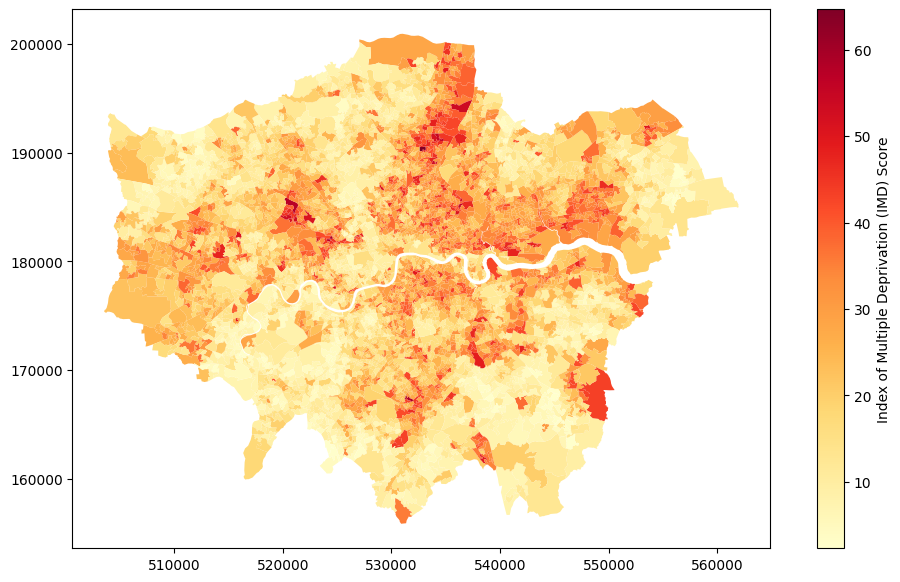

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
gdf_imd.plot(column='Index of Multiple Deprivation (IMD) Score', ax=ax, legend=True,
             legend_kwds={'label': "Index of Multiple Deprivation (IMD) Score",
                          'orientation': "vertical"},
            cmap='YlOrRd'
            )

legend = ax.get_legend()

plt.show()

## 1.5 census数据

In [87]:
# LSOA CODE need to change 21 to 11
LSOA_21to11 = pd.read_csv('LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv')

LSOA_21to11 = LSOA_21to11[["LSOA11CD","LSOA21CD"]]

LSOA_21to11

,LSOA11CD,LSOA21CD
0,E01000001,E01000001
1,E01000002,E01000002
2,E01000003,E01000003
3,E01000005,E01000005
4,E01000006,E01000006
...,...,...
35791,W01001922,W01001922
35792,W01001923,W01001923
35793,W01001924,W01001924
35794,W01001925,W01001925


### population density

In [88]:
# The number of population

# Load the Excel file
excel_file = 'Five year age bands.xlsx'

# Get the list of sheet names
xl = pd.ExcelFile(excel_file)
sheet_names = xl.sheet_names
    
# Read the raw sheet into a DataFrame
residents = pd.read_excel('Five year age bands.xlsx', sheet_name=sheet_names[-2])

residents = residents[["LSOA code","All usual residents"]]

residents

,LSOA code,All usual residents
0,E01000001,1484
1,E01000002,1382
2,E01000003,1617
3,E01000005,1098
4,E01032739,1613
...,...,...
4989,E01035718,2566
4990,E01035719,1270
4991,E01035720,1226
4992,E01035721,2336


### travel

In [89]:
# The number of population

# Load the Excel file
excel_file = 'Distance traveled to work.xlsx'

# Get the list of sheet names
xl = pd.ExcelFile(excel_file)
sheet_names = xl.sheet_names
    
# Read the raw sheet into a DataFrame
distance = pd.read_excel('Distance traveled to work.xlsx', sheet_name=sheet_names[-2])

# Creat a new dataset and input the number of people who work from home or work from office，and different commuting distances
distance_data = []

for index, row in distance.iterrows():
    lsoa_code = row['LSOA code']

    distance_5km = row['Less than 2km'] + row['2km to less than 5km']
    distance_5_10km = row['5km to less than 10km'] + row['10km to less than 20km']
    distance_20km = row ['20km to less than 30km'] + row['30km to less than 40km'] + row['40km to less than 60km'] + row['60km and over']
    
    new_row = {'LSOA code': lsoa_code, 'distance_5km' : distance_5km, 'distance_5_10km' : distance_5_10km , 'distance_20km' : distance_20km }
    distance_data.append(new_row)

# Change the list to DataFrame
distance_df = pd.DataFrame(distance_data)

# Check the dataset
distance_df.head()

,LSOA code,distance_5km,distance_5_10km,distance_20km
0,E01000001,137,45,9
1,E01000002,118,27,11
2,E01000003,225,82,10
3,E01000005,173,72,8
4,E01032739,230,62,16


In [90]:
census = pd.merge(residents, distance_df, on = "LSOA code", how='left')

In [91]:
gdf_density = pd.merge(gdf_LSOA, LSOA_21to11, on = "LSOA11CD", how='left')
gdf_density

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,area,LSOA21CD
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181...",1.333208e+05,E01000001
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",2.261913e+05,E01000002
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182...",5.730297e+04,E01000003
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180...",1.907388e+05,E01000005
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",1.441958e+05,E01000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.68 179824.674, 544766.313 179...",1.233092e+05,E01033742
5012,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",1.004853e+06,E01033743
5013,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.63 179...",1.522620e+05,E01033744
5014,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.27, 546320.715 180...",5.584777e+05,E01033745


In [92]:
gdf_density2 = pd.merge(gdf_density, census,left_on = "LSOA21CD", right_on= 'LSOA code',how='left')
gdf_density2

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,HHOLDS,AVHHOLDSZ,geometry,area,LSOA21CD,LSOA code,All usual residents,distance_5km,distance_5_10km,distance_20km
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181...",1.333208e+05,E01000001,E01000001,1484,137,45,9
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",2.261913e+05,E01000002,E01000002,1382,118,27,11
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182...",5.730297e+04,E01000003,E01000003,1617,225,82,10
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180...",1.907388e+05,E01000005,E01000005,1098,173,72,8
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",1.441958e+05,E01000006,E01000006,1838,150,268,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,...,581,2.3,"POLYGON ((544642.68 179824.674, 544766.313 179...",1.233092e+05,E01033742,E01033742,1346,79,258,37
5012,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,...,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",1.004853e+06,E01033743,E01033743,1947,135,297,71
5013,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,...,646,2.7,"POLYGON ((544536.486 179447.115, 544602.63 179...",1.522620e+05,E01033744,E01033744,1805,147,292,40
5014,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,...,591,3.1,"POLYGON ((546415.745 180152.27, 546320.715 180...",5.584777e+05,E01033745,E01033745,1783,135,251,66


In [93]:
pop_density = gdf_density2[["LSOA11CD","area","All usual residents","distance_5km","distance_5_10km","distance_20km"]]
pop_density["pop_density"] = pop_density["All usual residents"]/(pop_density["area"]/ 1e6)

In [94]:
pop_density = pop_density.drop(columns=["area","All usual residents"])

In [95]:
pop_density

,LSOA11CD,distance_5km,distance_5_10km,distance_20km,pop_density
0,E01000001,137,45,9,11131.048918
1,E01000002,118,27,11,6109.873212
2,E01000003,225,82,10,28218.434367
3,E01000005,173,72,8,5756.564618
4,E01000006,150,268,69,12746.552970
...,...,...,...,...,...
5011,E01033742,79,258,37,10915.650722
5012,E01033743,135,297,71,1937.596674
5013,E01033744,147,292,40,11854.566992
5014,E01033745,135,251,66,3192.607317


In [96]:
gdf_pop_density = pd.merge(gdf_LSOA, pop_density,on = "LSOA11CD",how='left')


gdf_pop_density.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   LSOA11CD         5016 non-null   object  
 1   LSOA11NM         5016 non-null   object  
 2   MSOA11CD         5016 non-null   object  
 3   MSOA11NM         5016 non-null   object  
 4   LAD11CD          5016 non-null   object  
 5   LAD11NM          5016 non-null   object  
 6   RGN11CD          5016 non-null   object  
 7   RGN11NM          5016 non-null   object  
 8   USUALRES         5016 non-null   int32   
 9   HHOLDRES         5016 non-null   int32   
 10  COMESTRES        5016 non-null   int32   
 11  POPDEN           5016 non-null   float64 
 12  HHOLDS           5016 non-null   int32   
 13  AVHHOLDSZ        5016 non-null   float64 
 14  geometry         5016 non-null   geometry
 15  area             5016 non-null   float64 
 16  distance_5km     5016 non-null   i

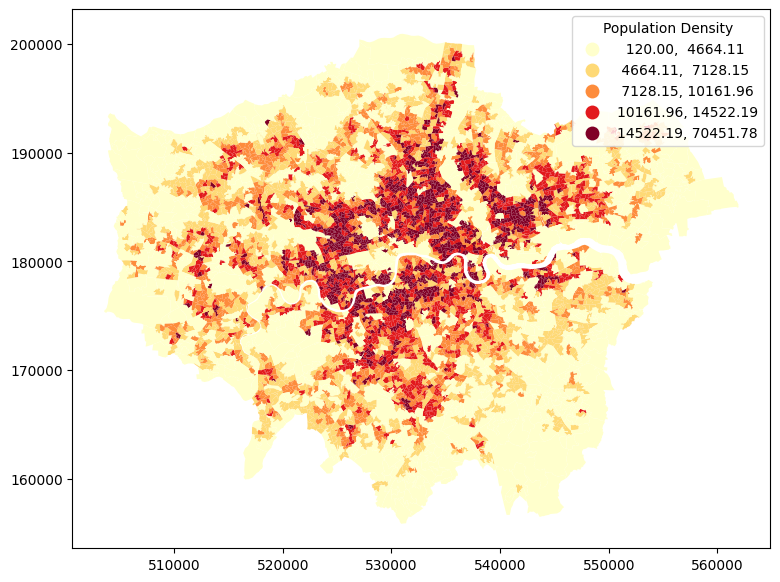

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf_pop_density is your GeoDataFrame and is already loaded

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
plot = gdf_pop_density.plot(column='pop_density', ax=ax, legend=True,
                            cmap='YlOrRd', scheme='quantiles', k=5)

# Setting legend title and adjusting orientation
legend = ax.get_legend()
legend.set_title("Population Density")
legend.set_bbox_to_anchor((1,1))  # Adjust position as needed
legend.set_frame_on(True)  # Optional, to add a frame around the legend

plt.show()

## 1.6 bus_stop and shops from OSM

In [98]:
# bus_stop_tags = {"highway": "bus_stop"}
# place = "London, UK"
# boundary = ox.geocode_to_gdf(place)
# bus_stops = ox.geometries_from_polygon(boundary.geometry[0], bus_stop_tags)
# bus_stops_gdf = gpd.GeoDataFrame(bus_stops)
# bus_stops_gdf.to_file("london_bus_stops.geojson", driver="GeoJSON")

In [99]:
# shop_tags = {"shop": True}
# shops = ox.geometries_from_polygon(boundary.geometry[0], shop_tags)
# shops_gdf = gpd.GeoDataFrame(shops)

In [100]:
# # Inspect data types
# print(shops_gdf.dtypes)

# # Example of handling list types in a column 'my_column'
# if 'my_column' in shops_gdf.columns and isinstance(shops_gdf['my_column'].iloc[0], list):
#     shops_gdf['my_column'] = shops_gdf['my_column'].apply(lambda x: ', '.join(map(str, x)))

# # After handling list data types, try saving again
# shops_gdf.to_file("london_shops.geojson", driver="GeoJSON")

# 2 Merge

## 2.1 Merge all df information

In [101]:
# 合并IMD
df_merged_3 = pd.merge(df_merged_2, df_imd_filtered, left_on='lsoa_of_accident_location', right_on='LSOA code (2011)', how='left')
df_merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10445 entries, 0 to 10444
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   accident_index                             10445 non-null  object 
 1   casualty_class                             10445 non-null  object 
 2   age_of_casualty                            10445 non-null  float64
 3   casualty_severity                          10445 non-null  int64  
 4   location_easting_osgr                      10445 non-null  float64
 5   location_northing_osgr                     10445 non-null  float64
 6   longitude                                  10445 non-null  float64
 7   latitude                                   10445 non-null  float64
 8   lsoa_of_accident_location                  10445 non-null  object 
 9   accident_severity                          10445 non-null  object 
 10  number_of_vehicles    

In [102]:
# Merge pop_density
df_merged_4 = pd.merge(df_merged_3, pop_density, left_on='lsoa_of_accident_location', right_on='LSOA11CD', how='left')

In [103]:
df_merged_4 = df_merged_4.drop(columns = ["LSOA code (2011)","LSOA11CD"])

In [104]:
df_merged_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   accident_index                             11592 non-null  object 
 1   casualty_class                             11592 non-null  object 
 2   age_of_casualty                            11592 non-null  float64
 3   casualty_severity                          11592 non-null  int64  
 4   location_easting_osgr                      11592 non-null  float64
 5   location_northing_osgr                     11592 non-null  float64
 6   longitude                                  11592 non-null  float64
 7   latitude                                   11592 non-null  float64
 8   lsoa_of_accident_location                  11592 non-null  object 
 9   accident_severity                          11592 non-null  object 
 10  number_of_vehicles    

## 2.2 Spatially connect accident data and bus stops, and calculate how many bus stops there are in the 50m buffer zone

In [105]:
# Create a GeoDataFrame for accident data
gdf_final = gpd.GeoDataFrame(
    df_merged_4,
    geometry=gpd.points_from_xy(df_merged_4.location_easting_osgr, df_merged_4.location_northing_osgr),
    crs="EPSG:27700"  
)

In [106]:
# GeoDataFrame of bus stop, converted to British National Grid
bus_stops_gdf = gpd.read_file('london_bus_stops.geojson')
bus_stops_gdf = bus_stops_gdf.to_crs("EPSG:27700")

In [107]:
# 50m buffer
gdf_final['buffer'] = gdf_final.geometry.buffer(50)  

# Set the buffer as the active geometry column
gdf_final.set_geometry('buffer', inplace=True)

joined = gpd.sjoin(gdf_final, bus_stops_gdf, how="inner", predicate='intersects')

# Count the number of bus stops near each accident location
bus_stops_count = joined.groupby('accident_index').size()

In [108]:
bus_stops_count

accident_index
2023010419171    4
2023010419189    1
2023010419191    1
2023010419198    2
2023010419209    2
                ..
2023481368817    1
2023481368846    1
2023481369636    2
2023481369643    2
2023481369671    1
Length: 3598, dtype: int64

In [109]:
# merge
bus_stops_count_df = bus_stops_count.reset_index()
bus_stops_count_df.columns = ['accident_index', 'bus_stop_count']

bus_stops_count_df

,accident_index,bus_stop_count
0,2023010419171,4
1,2023010419189,1
2,2023010419191,1
3,2023010419198,2
4,2023010419209,2
...,...,...
3593,2023481368817,1
3594,2023481368846,1
3595,2023481369636,2
3596,2023481369643,2


In [110]:
df_merged_5 = pd.merge(df_merged_4,bus_stops_count_df,on = "accident_index",how = "left")

In [111]:
df_merged_5['bus_stop_count'] = df_merged_5['bus_stop_count'].fillna(0)

df_merged_5

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,urban_or_rural_area,junction_detail,avg_age_of_vehicle,avg_age_of_driver,Index of Multiple Deprivation (IMD) Score,distance_5km,distance_5_10km,distance_20km,pop_density,bus_stop_count
0,2023010419171,Pedestrian,20.0,0,525060.0,170416.0,-0.202878,51.418974,E01003383,Slight,...,NaN,Other_junction,5.570,61.000000,6.668,119,162,16,6531.839572,4.0
1,2023010419183,Driver,25.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,NaN,T_junction,5.760,40.333333,29.152,171,261,59,8297.281176,0.0
2,2023010419183,Passenger,38.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,NaN,T_junction,5.760,40.333333,29.152,171,261,59,8297.281176,0.0
3,2023010419189,Driver,50.0,0,508702.0,177696.0,-0.435789,51.487777,E01002448,Slight,...,NaN,Roundabout,5.670,40.000000,18.249,318,272,69,3008.698170,1.0
4,2023010419191,Driver,34.0,0,520341.0,190175.0,-0.263972,51.597575,E01000129,Slight,...,NaN,T_junction,6.660,36.606545,31.000,148,241,39,9222.263606,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,2023481369636,Driver,35.0,0,531715.0,181456.0,-0.103115,51.516680,E01032740,Slight,...,NaN,T_junction,5.415,50.000000,15.841,175,35,7,2177.213567,2.0
11588,2023481369643,Driver,31.0,0,533314.0,181658.0,-0.080008,51.518121,E01032739,Slight,...,NaN,not_junction,5.650,35.500000,13.584,230,62,16,972.567785,2.0
11589,2023481369648,Driver,24.0,0,532802.0,180541.0,-0.087803,51.508203,E01032739,Slight,...,NaN,not_junction,5.805,38.000000,13.584,230,62,16,972.567785,0.0
11590,2023481369657,Driver,39.0,0,531378.0,181561.0,-0.107930,51.517702,E01032740,Slight,...,NaN,Other_junction,5.925,49.500000,15.841,175,35,7,2177.213567,0.0


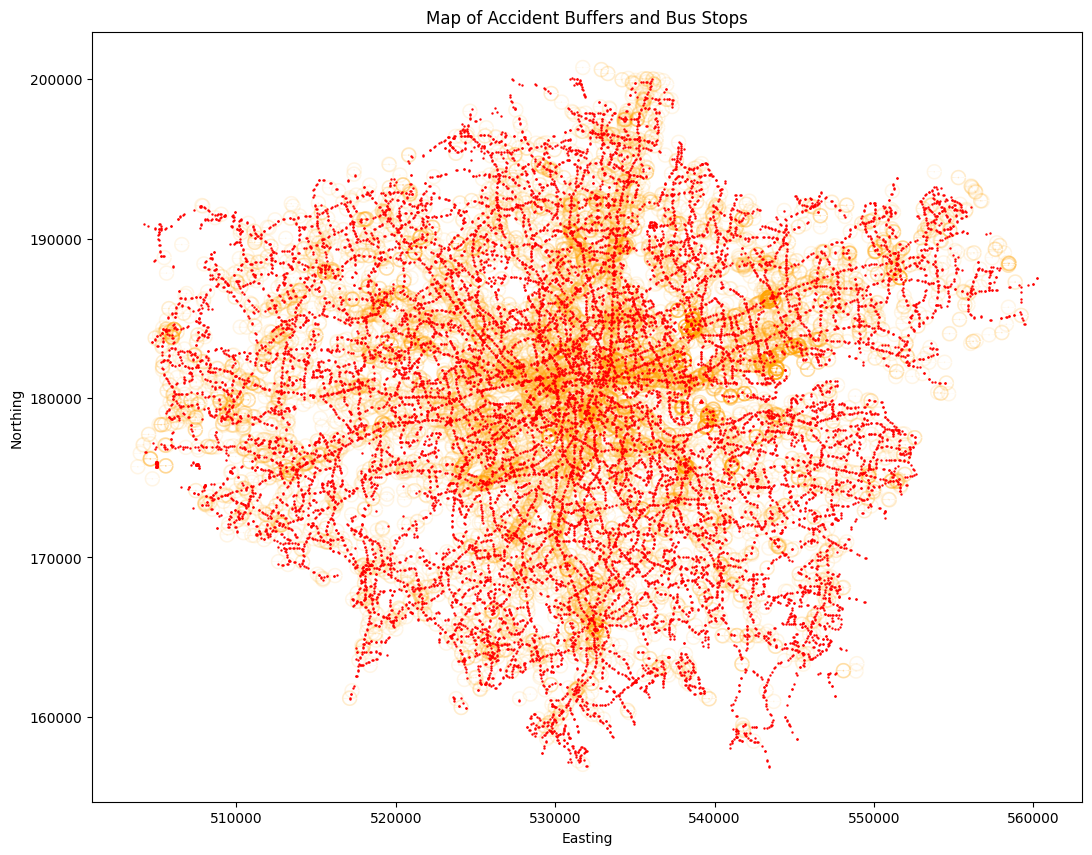

In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt

# The creation of the GeoDataFrame and bus stop data was done in previous steps

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))  # Set the figure size
# Plot the 50-meter buffers around accident points with blue borders
gdf_final['buffer'].plot(ax=ax, alpha=0.1, color='orange', edgecolor='orange', linewidth=10, label='Accident Buffers')

bus_stops_gdf.plot(ax=ax, color='red', markersize=0.5, label='Bus Stops')  # Plot the bus stops

# Add some figure attributes
ax.set_title('Map of Accident Buffers and Bus Stops')  # Set the title
ax.set_xlabel('Easting')  # Set the X-axis label
ax.set_ylabel('Northing')  # Set the Y-axis label
# plt.legend()  # Display the legend (uncomment if needed)

# Display the figure
plt.show()


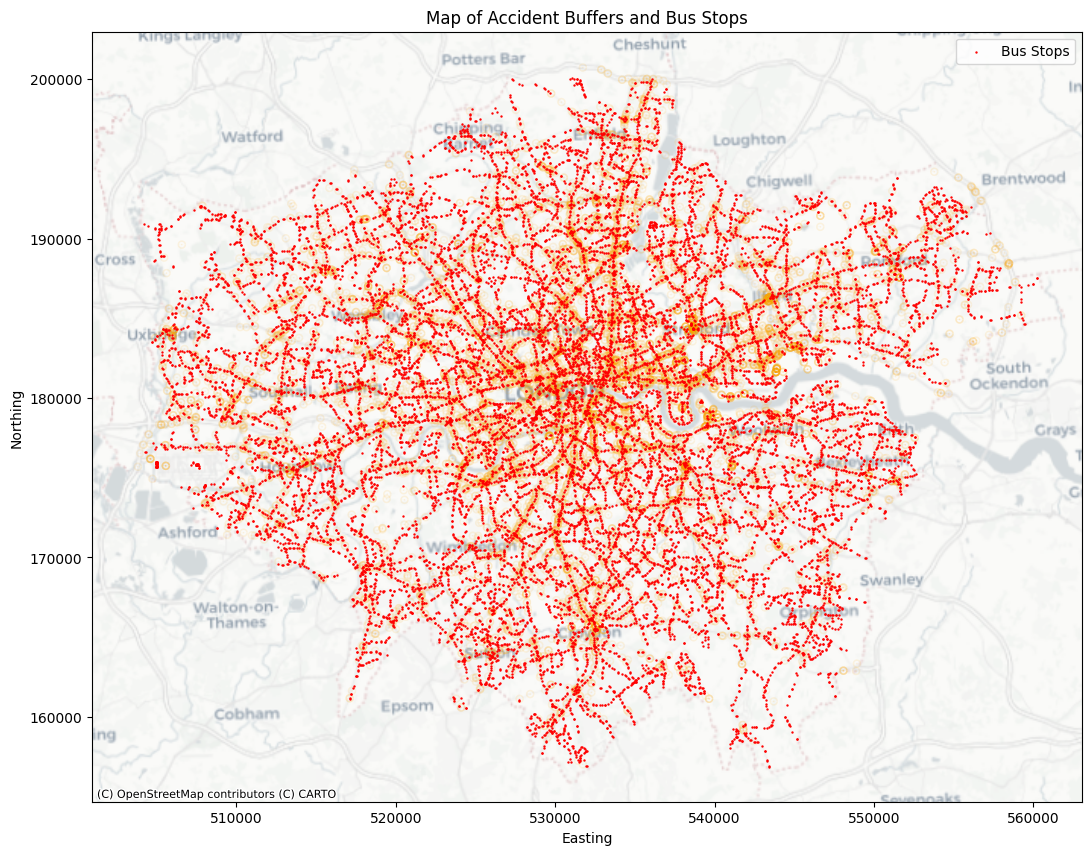

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # Import the contextily library

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))  # Set the figure size
# Plot the 50-meter buffers around accident points with orange color and border
gdf_final['buffer'].plot(ax=ax, alpha=0.1, color='orange', edgecolor='orange', linewidth=5, label='Accident Buffers')

bus_stops_gdf.plot(ax=ax, color='red', markersize=0.5, label='Bus Stops')  # Plot the bus stops

# Set the axis to equal distance (important for spatial data)
ax.set_aspect('equal')

# Add some figure attributes
ax.set_title('Map of Accident Buffers and Bus Stops')  # Set the title
ax.set_xlabel('Easting')  # Set the X-axis label
ax.set_ylabel('Northing')  # Set the Y-axis label
plt.legend()  # Display the legend

# Add the OSM black-and-white basemap
ctx.add_basemap(ax, crs=gdf_final.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Display the figure
plt.show()


In [114]:
# Check the coordinate reference system (CRS)
print(gdf_final.crs)
print(bus_stops_gdf.crs)

EPSG:27700
EPSG:27700


In [115]:
# Check the size (area) of the buffers
print(gdf_final['buffer'].area.head())

0    7841.371226
1    7841.371226
2    7841.371226
3    7841.371226
4    7841.371226
dtype: float64


## 2.3 Spatially connect SHOPS points and LSOA to calculate the density of shop

In [116]:
# Read the shops GeoDataFrame and convert it to the British National Grid (EPSG:27700)
shops_gdf = gpd.read_file('london_shops_cleaned.geojson')
shops_gdf = shops_gdf.to_crs("EPSG:27700")

Skipping field ways: unsupported OGR type: 1


In [117]:
shops_gdf

,element_type,osmid,amenity,entrance,level,wheelchair,branch,name,shop,addr:city,...,payment:wechat,service:vehicle:transmission,service:vehicle:transmission_repair,bakery,source:date,room,unit,type,company,geometry
0,node,21663357,fuel,None,None,None,BP,bp,yes,None,...,None,None,None,None,NaT,None,None,None,None,POINT (514994.585 187996.733)
1,node,25544124,None,None,None,yes,None,Tesco Express,convenience,London,...,None,None,None,None,NaT,None,None,None,None,POINT (530201.037 180798.619)
2,node,25641515,None,None,None,None,None,None,furniture,None,...,None,None,None,None,NaT,None,None,None,None,POINT (526099.473 185027.457)
3,node,25744394,None,None,None,limited,None,Tesco Express,convenience,London,...,None,None,None,None,NaT,None,None,None,None,POINT (528378.869 186422.445)
4,node,25813308,None,None,None,None,None,Tesco Express,convenience,London,...,None,None,None,None,NaT,None,None,None,None,POINT (529536.562 184589.478)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40429,relation,15273641,None,None,None,None,None,National Tyres and Autocare,car_repair,London,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((537887.969 177237.897, 537901.613 17..."
40430,relation,15395583,None,None,None,None,None,Waitrose,supermarket,London,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((526102.307 191878.837, 526107.114 19..."
40431,relation,15608716,None,None,None,None,None,Next,clothes,None,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((532180.705 181180.929, 532189.684 18..."
40432,relation,16564769,None,None,None,None,None,Le Brixton Deli,deli,None,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((531267.169 175414.872, 531274.057 17..."


In [118]:
# Perform the spatial join
joined = gpd.sjoin(gdf_final, shops_gdf, how="inner", predicate='intersects')

# Count the number of shops near each accident location
shops_count = joined.groupby('accident_index').size()

In [119]:
shops_count

accident_index
2023010419171     2
2023010419189     1
2023010419191     3
2023010419198    11
2023010419245    10
                 ..
2023481368801     2
2023481368846     2
2023481369643     4
2023481369657     1
2023481369671     5
Length: 3695, dtype: int64

In [120]:
# merge
shops_count_df = shops_count.reset_index()
shops_count_df.columns = ['accident_index', 'shops_count']

shops_count_df

,accident_index,shops_count
0,2023010419171,2
1,2023010419189,1
2,2023010419191,3
3,2023010419198,11
4,2023010419245,10
...,...,...
3690,2023481368801,2
3691,2023481368846,2
3692,2023481369643,4
3693,2023481369657,1


In [121]:
df_merged_6 = pd.merge(df_merged_5,shops_count_df,on = "accident_index",how = "left")

In [122]:
# Replace NaN values with 0
df_merged_6['shops_count'] = df_merged_6['shops_count'].fillna(0)

df_merged_6

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,junction_detail,avg_age_of_vehicle,avg_age_of_driver,Index of Multiple Deprivation (IMD) Score,distance_5km,distance_5_10km,distance_20km,pop_density,bus_stop_count,shops_count
0,2023010419171,Pedestrian,20.0,0,525060.0,170416.0,-0.202878,51.418974,E01003383,Slight,...,Other_junction,5.570,61.000000,6.668,119,162,16,6531.839572,4.0,2.0
1,2023010419183,Driver,25.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,T_junction,5.760,40.333333,29.152,171,261,59,8297.281176,0.0,0.0
2,2023010419183,Passenger,38.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,T_junction,5.760,40.333333,29.152,171,261,59,8297.281176,0.0,0.0
3,2023010419189,Driver,50.0,0,508702.0,177696.0,-0.435789,51.487777,E01002448,Slight,...,Roundabout,5.670,40.000000,18.249,318,272,69,3008.698170,1.0,1.0
4,2023010419191,Driver,34.0,0,520341.0,190175.0,-0.263972,51.597575,E01000129,Slight,...,T_junction,6.660,36.606545,31.000,148,241,39,9222.263606,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,2023481369636,Driver,35.0,0,531715.0,181456.0,-0.103115,51.516680,E01032740,Slight,...,T_junction,5.415,50.000000,15.841,175,35,7,2177.213567,2.0,0.0
11588,2023481369643,Driver,31.0,0,533314.0,181658.0,-0.080008,51.518121,E01032739,Slight,...,not_junction,5.650,35.500000,13.584,230,62,16,972.567785,2.0,4.0
11589,2023481369648,Driver,24.0,0,532802.0,180541.0,-0.087803,51.508203,E01032739,Slight,...,not_junction,5.805,38.000000,13.584,230,62,16,972.567785,0.0,0.0
11590,2023481369657,Driver,39.0,0,531378.0,181561.0,-0.107930,51.517702,E01032740,Slight,...,Other_junction,5.925,49.500000,15.841,175,35,7,2177.213567,0.0,1.0


In [123]:
df_merged_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   accident_index                             11592 non-null  object 
 1   casualty_class                             11592 non-null  object 
 2   age_of_casualty                            11592 non-null  float64
 3   casualty_severity                          11592 non-null  int64  
 4   location_easting_osgr                      11592 non-null  float64
 5   location_northing_osgr                     11592 non-null  float64
 6   longitude                                  11592 non-null  float64
 7   latitude                                   11592 non-null  float64
 8   lsoa_of_accident_location                  11592 non-null  object 
 9   accident_severity                          11592 non-null  object 
 10  number_of_vehicles    

# borough

In [8]:
boroughs = gpd.read_file("statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp")

In [9]:
boroughs

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.68 179824.674, 544766.313 179..."
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18..."
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.63 179..."
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.27, 546320.715 180..."


In [12]:
df_merged_6 = pd.read_csv('london_traffic_accidents_alldata2023.csv')

In [10]:
LAD11NM_LSOA = boroughs[['LSOA11CD','LAD11NM']]

In [16]:
df_2023_ = df_merged_6.copy()

In [17]:
df_2023_['LSOA11CD'] = df_2023_['lsoa_of_accident_location']

In [18]:
df_2023_LAD11NM = pd.merge(df_2023_,LAD11NM_LSOA,on = "LSOA11CD",how = "left")

In [22]:
df_2023_LAD11NM.drop(columns=['LSOA11CD'])

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,avg_age_of_vehicle,avg_age_of_driver,Index of Multiple Deprivation (IMD) Score,distance_5km,distance_5_10km,distance_20km,pop_density,bus_stop_count,shops_count,LAD11NM
0,2023010419171,Pedestrian,20.0,0,525060.0,170416.0,-0.202878,51.418974,E01003383,Slight,...,5.570,61.000000,6.668,119,162,16,6531.839572,4.0,2.0,Merton
1,2023010419183,Driver,25.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,5.760,40.333333,29.152,171,261,59,8297.281176,0.0,0.0,Enfield
2,2023010419183,Passenger,38.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,5.760,40.333333,29.152,171,261,59,8297.281176,0.0,0.0,Enfield
3,2023010419189,Driver,50.0,0,508702.0,177696.0,-0.435789,51.487777,E01002448,Slight,...,5.670,40.000000,18.249,318,272,69,3008.698170,1.0,1.0,Hillingdon
4,2023010419191,Driver,34.0,0,520341.0,190175.0,-0.263972,51.597575,E01000129,Slight,...,6.660,36.606545,31.000,148,241,39,9222.263606,1.0,3.0,Barnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,2023481369636,Driver,35.0,0,531715.0,181456.0,-0.103115,51.516680,E01032740,Slight,...,5.415,50.000000,15.841,175,35,7,2177.213567,2.0,0.0,City of London
11588,2023481369643,Driver,31.0,0,533314.0,181658.0,-0.080008,51.518121,E01032739,Slight,...,5.650,35.500000,13.584,230,62,16,972.567785,2.0,4.0,City of London
11589,2023481369648,Driver,24.0,0,532802.0,180541.0,-0.087803,51.508203,E01032739,Slight,...,5.805,38.000000,13.584,230,62,16,972.567785,0.0,0.0,City of London
11590,2023481369657,Driver,39.0,0,531378.0,181561.0,-0.107930,51.517702,E01032740,Slight,...,5.925,49.500000,15.841,175,35,7,2177.213567,0.0,1.0,City of London


In [24]:
df_2023_LAD11NM.to_csv('london_traffic_accidents_alldata2023_with_LAD11NM.csv', index=False)

In [124]:
df_merged_6.to_csv('london_traffic_accidents_alldata2023.csv', index=False)

## 2.4 one-hot encoding for categorical data

In [125]:
df_merged_6.columns

Index(['accident_index', 'casualty_class', 'age_of_casualty',
       'casualty_severity', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'lsoa_of_accident_location',
       'accident_severity', 'number_of_vehicles', 'day_of_week',
       'first_road_class', 'speed_limit', 'road_type',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'urban_or_rural_area', 'junction_detail',
       'avg_age_of_vehicle', 'avg_age_of_driver',
       'Index of Multiple Deprivation (IMD) Score', 'distance_5km',
       'distance_5_10km', 'distance_20km', 'pop_density', 'bus_stop_count',
       'shops_count'],
      dtype='object')

In [25]:
# One-Hot Encoding for categorical variables with dropping the first category
categorical_columns = [
    'casualty_class','accident_severity','road_type',
    'day_of_week', 'first_road_class',
    # 'speed_limit', 
    'pedestrian_crossing_physical_facilities', 'light_conditions',
    'weather_conditions', 
    # 'urban_or_rural_area',
    'junction_detail'
]

df_final_encoded = pd.get_dummies(df_merged_6, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
df_final_encoded.head()

,accident_index,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,number_of_vehicles,speed_limit,...,pedestrian_crossing_physical_facilities_Zebra,pedestrian_crossing_physical_facilities_pedestrian_light_controlled,light_conditions_Night_time_light,light_conditions_Night_time_nolight,weather_conditions_Fog,weather_conditions_Raining/Snowing,junction_detail_Other_junction,junction_detail_Roundabout,junction_detail_T_junction,junction_detail_not_junction
0,2023010419171,20.0,0,525060.0,170416.0,-0.202878,51.418974,E01003383,1,20.0,...,False,True,True,False,False,False,True,False,False,False
1,2023010419183,25.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,3,30.0,...,True,False,True,False,False,False,False,False,True,False
2,2023010419183,38.0,0,535463.0,198745.0,-0.042464,51.671155,E01001547,3,30.0,...,True,False,True,False,False,False,False,False,True,False
3,2023010419189,50.0,0,508702.0,177696.0,-0.435789,51.487777,E01002448,2,30.0,...,False,False,True,False,False,False,False,True,False,False
4,2023010419191,34.0,0,520341.0,190175.0,-0.263972,51.597575,E01000129,2,30.0,...,False,False,True,False,False,False,False,False,True,False


In [26]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 42 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   accident_index                                                       11592 non-null  int64  
 1   age_of_casualty                                                      11592 non-null  float64
 2   casualty_severity                                                    11592 non-null  int64  
 3   location_easting_osgr                                                11592 non-null  float64
 4   location_northing_osgr                                               11592 non-null  float64
 5   longitude                                                            11592 non-null  float64
 6   latitude                                                             11592 non-null  float64
 7   lsoa

In [27]:
columns_to_convert = [
'casualty_class_Passenger',
       'casualty_class_Pedestrian', 'accident_severity_Serious',
       'accident_severity_Slight', 'road_type_Other', 'road_type_Single',
       'day_of_week_Weekend', 'first_road_class_B_Road', 'first_road_class_C_Road',
       'first_road_class_Motorway', 'first_road_class_Unclassified',
       # 'speed_limit_30.0', 'speed_limit_40.0', 'speed_limit_50.0',
       # 'speed_limit_60.0', 'speed_limit_70.0',
       'pedestrian_crossing_physical_facilities_Others',
       'pedestrian_crossing_physical_facilities_Zebra',
       'pedestrian_crossing_physical_facilities_pedestrian_light_controlled',
       'light_conditions_Night_time_light',
       'light_conditions_Night_time_nolight', 'weather_conditions_Fog',
       'weather_conditions_Raining/Snowing', 
    # 'urban_or_rural_area_Urban',
       'junction_detail_Other_junction', 'junction_detail_Roundabout',
       'junction_detail_T_junction', 'junction_detail_not_junction'
]

for col in columns_to_convert:
    df_final_encoded[col] = df_final_encoded[col].astype(int)

In [129]:
df_final_encoded.to_csv('london_traffic_accidents_onehot2023.csv', index=False)

In [28]:
df_final_encoded.columns

Index(['accident_index', 'age_of_casualty', 'casualty_severity',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'lsoa_of_accident_location', 'number_of_vehicles',
       'speed_limit', 'urban_or_rural_area', 'avg_age_of_vehicle',
       'avg_age_of_driver', 'Index of Multiple Deprivation (IMD) Score',
       'distance_5km', 'distance_5_10km', 'distance_20km', 'pop_density',
       'bus_stop_count', 'shops_count', 'casualty_class_Passenger',
       'casualty_class_Pedestrian', 'accident_severity_Serious',
       'accident_severity_Slight', 'road_type_Other', 'road_type_Single',
       'day_of_week_Weekend', 'first_road_class_B_Road',
       'first_road_class_C_Road', 'first_road_class_Motorway',
       'first_road_class_Unclassified',
       'pedestrian_crossing_physical_facilities_Others',
       'pedestrian_crossing_physical_facilities_Zebra',
       'pedestrian_crossing_physical_facilities_pedestrian_light_controlled',
       'light_conditio

In [29]:
df_2023_LAD11NM_ = pd.merge(df_final_encoded,LAD11NM_LSOA,left_on="lsoa_of_accident_location",right_on = "LSOA11CD",how = "left")

In [31]:
df_2023_LAD11NM_.to_csv('london_traffic_accidents_onehot2023_with_LAD11NM.csv', index=False)

# validation

In [135]:
# Read the boundary file for London boroughs
london_boroughs = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

# Use unary_union to merge the boundaries of all boroughs
london_boundary = london_boroughs.geometry.unary_union

# Create a new GeoDataFrame to store the merged boundary
london_boundary_gdf = gpd.GeoDataFrame(geometry=[london_boundary], crs=london_boroughs.crs)

# View the result
print(london_boundary_gdf)

                                            geometry
0  POLYGON ((528150.2 159979.2, 528100.9 160037.3...


In [131]:
# Convert accident data to a GeoDataFrame
df_merged_6['geometry'] = gpd.points_from_xy(df_merged_6.location_easting_osgr, df_merged_6.location_northing_osgr)
df_merged_6 = gpd.GeoDataFrame(df_merged_6, geometry='geometry')

In [132]:
casualty_map = df_merged_6.copy()

In [133]:
# Filter severe and non-severe accident data
severe_cases = casualty_map[casualty_map['casualty_severity'] == 1]
non_severe_cases = casualty_map[casualty_map['casualty_severity'] == 0]

In [137]:
non_severe_cases['casualty_severity'] = 1
non_severe_cases

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,avg_age_of_vehicle,avg_age_of_driver,Index of Multiple Deprivation (IMD) Score,distance_5km,distance_5_10km,distance_20km,pop_density,bus_stop_count,shops_count,geometry
0,2023010419171,Pedestrian,20.0,1,525060.0,170416.0,-0.202878,51.418974,E01003383,Slight,...,5.570,61.000000,6.668,119,162,16,6531.839572,4.0,2.0,POINT (525060 170416)
1,2023010419183,Driver,25.0,1,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,5.760,40.333333,29.152,171,261,59,8297.281176,0.0,0.0,POINT (535463 198745)
2,2023010419183,Passenger,38.0,1,535463.0,198745.0,-0.042464,51.671155,E01001547,Slight,...,5.760,40.333333,29.152,171,261,59,8297.281176,0.0,0.0,POINT (535463 198745)
3,2023010419189,Driver,50.0,1,508702.0,177696.0,-0.435789,51.487777,E01002448,Slight,...,5.670,40.000000,18.249,318,272,69,3008.698170,1.0,1.0,POINT (508702 177696)
4,2023010419191,Driver,34.0,1,520341.0,190175.0,-0.263972,51.597575,E01000129,Slight,...,6.660,36.606545,31.000,148,241,39,9222.263606,1.0,3.0,POINT (520341 190175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11586,2023481368846,Driver,39.0,1,532341.0,180987.0,-0.094275,51.512319,E01032739,Slight,...,5.650,34.500000,13.584,230,62,16,972.567785,1.0,2.0,POINT (532341 180987)
11587,2023481369636,Driver,35.0,1,531715.0,181456.0,-0.103115,51.516680,E01032740,Slight,...,5.415,50.000000,15.841,175,35,7,2177.213567,2.0,0.0,POINT (531715 181456)
11588,2023481369643,Driver,31.0,1,533314.0,181658.0,-0.080008,51.518121,E01032739,Slight,...,5.650,35.500000,13.584,230,62,16,972.567785,2.0,4.0,POINT (533314 181658)
11589,2023481369648,Driver,24.0,1,532802.0,180541.0,-0.087803,51.508203,E01032739,Slight,...,5.805,38.000000,13.584,230,62,16,972.567785,0.0,0.0,POINT (532802 180541)


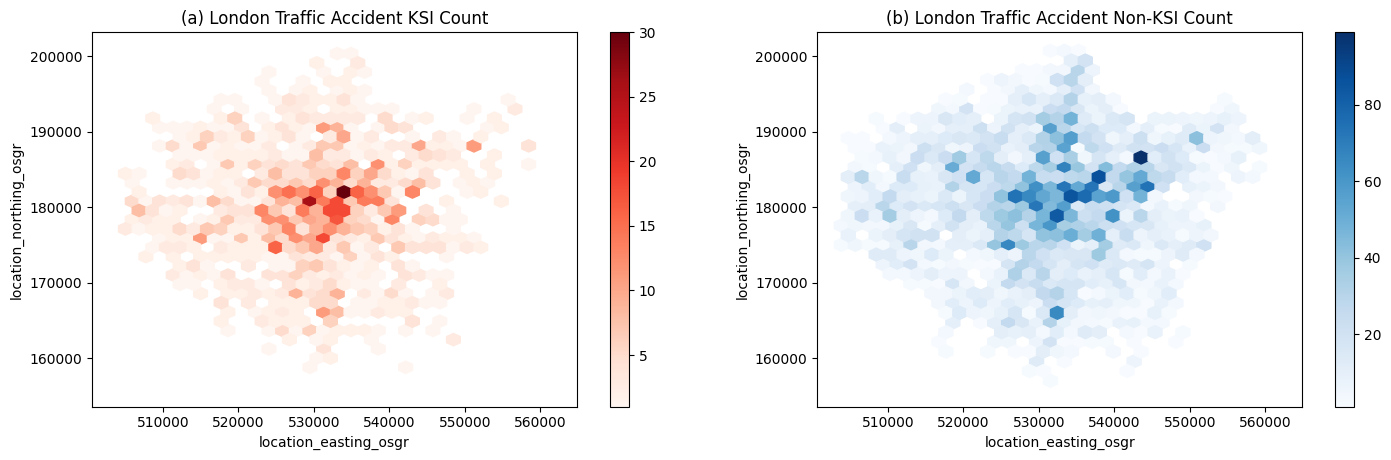

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Create a wide figure with two subplots arranged in one row
fig, axs = plt.subplots(1, 2, figsize=(15, 4.5))

# Plot the boundary and hexbin map of severe accidents on the first subplot
london_boundary_gdf.plot(ax=axs[0], color='white', edgecolor='white')
severe_cases.plot(ax=axs[0], kind='hexbin', 
                  x='location_easting_osgr', y='location_northing_osgr', 
                  C='casualty_severity', 
                  reduce_C_function=np.sum, 
                  gridsize=30, cmap='Reds')

# Set the title for the first subplot
axs[0].set_title('(a) London Traffic Accident KSI Count')

# Plot the boundary and hexbin map of non-severe accidents on the second subplot
london_boundary_gdf.plot(ax=axs[1], color='white', edgecolor='white')
non_severe_cases.plot(ax=axs[1], kind='hexbin', 
                      x='location_easting_osgr', y='location_northing_osgr', 
                      C='casualty_severity', 
                      reduce_C_function=np.sum, 
                      gridsize=30, cmap='Blues')

# Set the title for the second subplot
axs[1].set_title('(b) London Traffic Accident Non-KSI Count')

plt.tight_layout()

plt.savefig('Output/hexbin_map_2023_true.png')

# Display the entire figure
plt.show()


# Statistics of KSI accident rate

In [33]:
df_2023_LAD11NM_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 44 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   accident_index                                                       11592 non-null  int64  
 1   age_of_casualty                                                      11592 non-null  float64
 2   casualty_severity                                                    11592 non-null  int64  
 3   location_easting_osgr                                                11592 non-null  float64
 4   location_northing_osgr                                               11592 non-null  float64
 5   longitude                                                            11592 non-null  float64
 6   latitude                                                             11592 non-null  float64
 7   lsoa

In [35]:
# 1. Count the number of KSI accidents in each borough
ksi_count = df_2023_LAD11NM_[df_2023_LAD11NM_['casualty_severity'] == 1].groupby('LAD11NM')['casualty_severity'].count()

# 2. Count the total number of accidents in each borough
total_accidents = df_2023_LAD11NM_.groupby('LAD11NM')['casualty_severity'].count()

# 3. Calculate the KSI accident rate for each borough
ksi_rate = ksi_count / total_accidents

# Create a new DataFrame to display the results
ksi_rate_df = pd.DataFrame({
    'borough': ksi_rate.index,
    'ksi_rate': ksi_rate.values
})

# Sort the DataFrame by KSI rate in descending order
ksi_rate_df_sorted = ksi_rate_df.sort_values(by='ksi_rate', ascending=False).reset_index(drop=True)

ksi_rate_df_sorted


,borough,ksi_rate
0,City of London,0.268817
1,Richmond upon Thames,0.248619
2,Merton,0.224599
3,Hammersmith and Fulham,0.223684
4,Southwark,0.208413
5,Kensington and Chelsea,0.207317
6,Westminster,0.206960
7,Hounslow,0.203804
8,Lambeth,0.192225
9,Bromley,0.191824
